In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import time


In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

X = X / 255.0


/usr/local/lib/python3.12/dist-packages/sklearn/datasets/_openml.py:75: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
configs = {
    "1 layer (10)": (10,),
    "5 layers (10)": (10, 10, 10, 10, 10),
    "10 layers (10)": tuple([10]*10),
    "20 layers (10)": tuple([10]*20)
}


In [ ]:
results = {}

for name, hidden_layers in configs.items():
    print(f"\nTraining {name} ...")

    mlp = MLPClassifier(
        hidden_layer_sizes=hidden_layers,
        activation='relu',
        solver='adam',
        max_iter=30,        # small epochs for demonstration
        random_state=42,
        verbose=False
    )

    start = time.time()
    mlp.fit(X_train, y_train)
    end = time.time()

    # Save results
    results[name] = {
        "train_acc": mlp.score(X_train, y_train),
        "test_acc": mlp.score(X_test, y_test),
        "loss_curve": mlp.loss_curve_,
        "time": end - start
    }



Training 1 layer (10) ...


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



Training 5 layers (10) ...


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



Training 10 layers (10) ...


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



Training 20 layers (10) ...


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
for name, res in results.items():
    print(f"\n{name}")
    print(f"Training Accuracy: {res['train_acc']:.4f}")
    print(f"Test Accuracy: {res['test_acc']:.4f}")
    print(f"Training Time: {res['time']:.2f} sec")



1 layer (10)
Training Accuracy: 0.9568
Test Accuracy: 0.9305
Training Time: 10.03 sec

5 layers (10)
Training Accuracy: 0.9505
Test Accuracy: 0.9235
Training Time: 14.01 sec

10 layers (10)
Training Accuracy: 0.9474
Test Accuracy: 0.9248
Training Time: 19.81 sec

20 layers (10)
Training Accuracy: 0.8141
Test Accuracy: 0.8080
Training Time: 29.64 sec


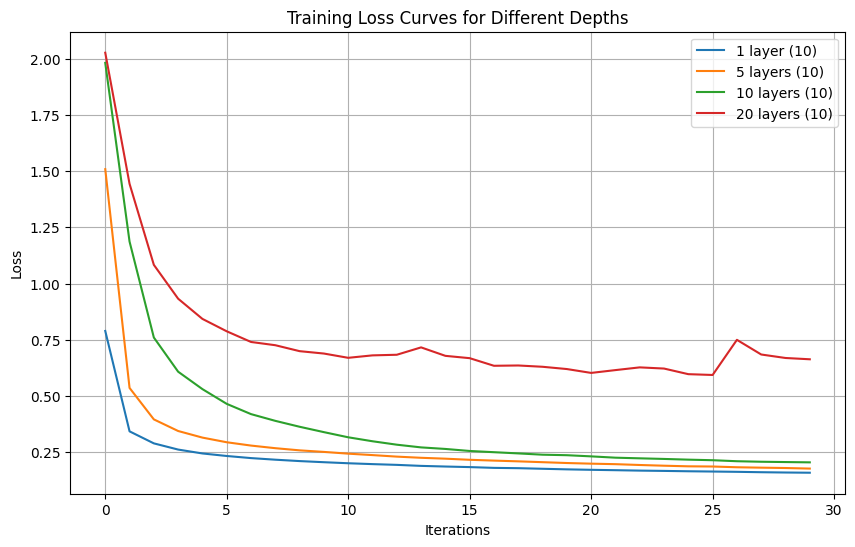

In [ ]:
plt.figure(figsize=(10,6))
for name, res in results.items():
    plt.plot(res['loss_curve'], label=name)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss Curves for Different Depths")
plt.legend()
plt.grid(True)
plt.show()


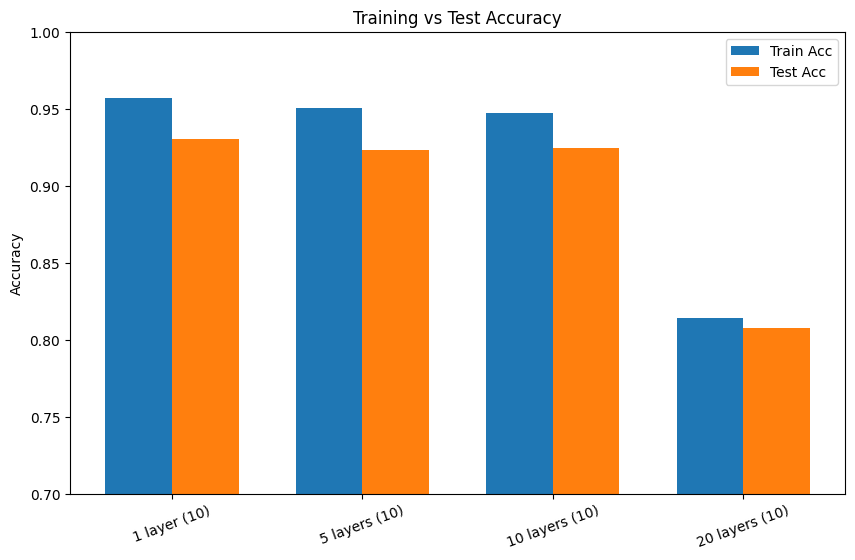

In [ ]:
labels = list(results.keys())
train_acc = [results[n]['train_acc'] for n in labels]
test_acc = [results[n]['test_acc'] for n in labels]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, train_acc, width, label="Train Acc")
plt.bar(x + width/2, test_acc, width, label="Test Acc")
plt.xticks(x, labels, rotation=20)
plt.ylim(0.7,1.0)
plt.ylabel("Accuracy")
plt.title("Training vs Test Accuracy")
plt.legend()
plt.show()
